In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [222]:
data=pd.read_csv('C:/Users/anilk/Documents/PGCBAA/Practice/Loan Prediction Dataset.csv')

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
data.shape

(614, 13)

In [85]:
data.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [245]:
data=data.drop('Loan_ID',axis=1)

In [14]:
test.size

1599

In [84]:
data.size

7982

In [224]:
pd.crosstab(data['Credit_History'], data['Loan_Status']) #for Credit_History=0 mostly loans are not granted and for Credit_History=1 mostly loans are granted

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

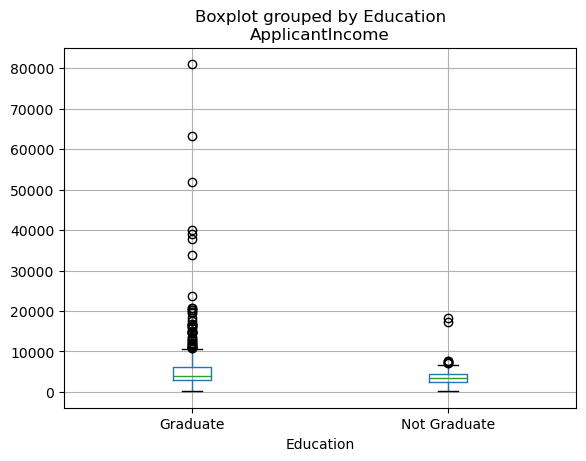

In [246]:
data.boxplot(column='ApplicantIncome',by='Education')

In [247]:
data.isnull().sum()
#number of missing values for each varaible

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [248]:
data['Gender'].fillna(data['Gender'].mode(),inplace=True)
#replace null values by mode value

In [249]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [250]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [251]:
data['Gender'].isnull().sum()

0

In [252]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)


In [253]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [254]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [255]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [256]:
data['LoanAmount'].mean()

146.41216216216216

In [257]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [258]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [263]:
x=data.iloc[:, np.r_[0:11]].values #np.r_ is used for constructing slices (like 1:5, 9:11, 13:15) into a single array that can be used to index the columns.

In [264]:
y=data.iloc[:,11].values

In [265]:
print(y)
print(x)

['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y

In [297]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [298]:
X_train

array([['Male', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'No', '1', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 0.0, 'Rural'],
       ...,
       ['Male', 'Yes', '3+', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban']], dtype=object)

In [299]:
from sklearn.preprocessing import LabelEncoder #to tranform categorical variables to numeric like 0,1,2
labelencoder_X= LabelEncoder() 

In [301]:
for i in range(0,5):
    X_train[:,i]= labelencoder_X.fit_transform(X_train[:,i])

In [302]:
X_train

array([[1, 1, 0, ..., 360.0, 1.0, 'Semiurban'],
       [1, 0, 1, ..., 360.0, 1.0, 'Semiurban'],
       [1, 1, 0, ..., 360.0, 0.0, 'Rural'],
       ...,
       [1, 1, 3, ..., 360.0, 1.0, 'Semiurban'],
       [1, 1, 0, ..., 360.0, 1.0, 'Urban'],
       [0, 1, 0, ..., 360.0, 1.0, 'Semiurban']], dtype=object)

In [303]:
X_train[:,10]= labelencoder_X.fit_transform(X_train[:,10])

In [304]:
X_train

array([[1, 1, 0, ..., 360.0, 1.0, 1],
       [1, 0, 1, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 0.0, 0],
       ...,
       [1, 1, 3, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [0, 1, 0, ..., 360.0, 1.0, 1]], dtype=object)

In [305]:
y_train

array(['Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N

In [306]:
y_train=labelencoder_X.fit_transform(y_train)

In [307]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [308]:
for i in range(0,5):
    X_test[:,i]= labelencoder_X.fit_transform(X_test[:,i])

In [309]:
X_test

array([[1, 0, 0, ..., 360.0, 1.0, 'Semiurban'],
       [0, 0, 0, ..., 360.0, 1.0, 'Semiurban'],
       [1, 1, 0, ..., 360.0, 1.0, 'Urban'],
       ...,
       [1, 1, 0, ..., 360.0, 1.0, 'Semiurban'],
       [1, 1, 3, ..., 180.0, 0.0, 'Urban'],
       [1, 1, 1, ..., 360.0, 1.0, 'Urban']], dtype=object)

In [310]:
X_test[:,10]= labelencoder_X.fit_transform(X_test[:,10])

In [311]:
y_test=labelencoder_X.fit_transform(y_test)

In [312]:
from sklearn.preprocessing import StandardScaler

In [313]:
ss=StandardScaler()

In [314]:
X_train=ss.fit_transform(X_train)# Skip 
X_test=ss.fit_transform(X_test)

In [315]:
print(X_test[:,4])

[ 2.90887237 -0.34377583 -0.34377583 -0.34377583 -0.34377583  2.90887237
 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583  2.90887237
 -0.34377583 -0.34377583 -0.34377583 -0.34377583  2.90887237 -0.34377583
  2.90887237 -0.34377583 -0.34377583 -0.34377583  2.90887237 -0.34377583
 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583
 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583
 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583
 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583
 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583
 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583
 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583
  2.90887237 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583
 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583 -0.34377583
 -0.34377583 -0.34377583 -0.34377583 -0.34377583  2

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [316]:
from sklearn.tree import DecisionTreeClassifier

In [317]:
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [319]:
y_pred=DTClassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [320]:
from sklearn import metrics

In [321]:
print('the accuracy of the decision tree is: ', metrics.accuracy_score(y_pred,y_test)) # between actual and predicted value

the accuracy of the decision tree is:  0.7235772357723578


In [325]:
#Naive Bayes algo
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(X_train,y_train)


GaussianNB()

In [329]:
y_pred=NBClassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [330]:
print('The accurarcy of Naive Bayes is : ', metrics.accuracy_score(y_pred,y_test) )

The accurarcy of Naive Bayes is :  0.8373983739837398


In [331]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
